
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Reading data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis




## Missing Data
 Using seaborn to create a simple heatmap to see where we are missing data

<Axes: >

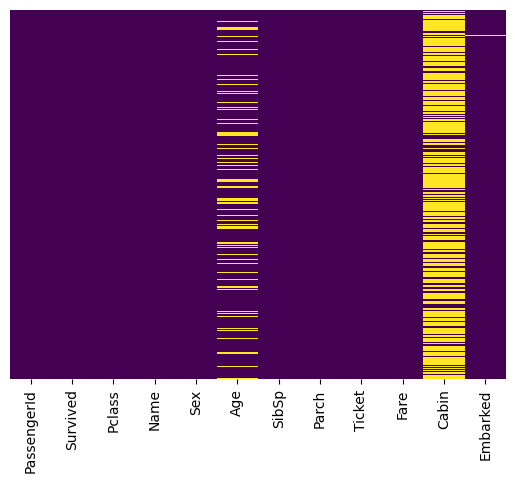

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# calculating is percent how much data in each column is missing
missing_percent = df.isnull().mean() * 100
missing_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

We can see that roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level so we will drop this.


# Visulizations

**Passengers Survived Count Plot**

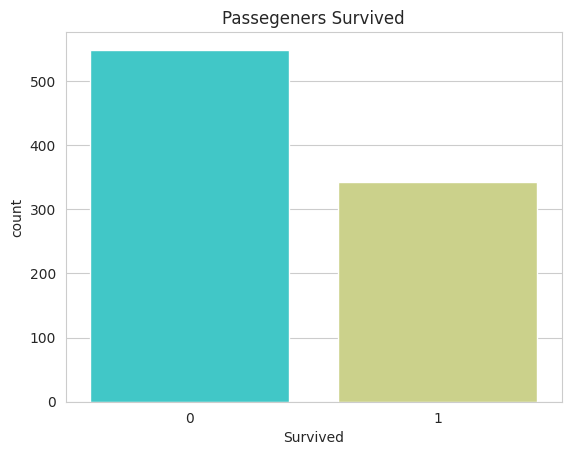

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,palette='rainbow',hue="Survived",legend=False)
plt.title('Passegeners Survived')
plt.show()

**Passegeners Survived Countplot Based on Gender**

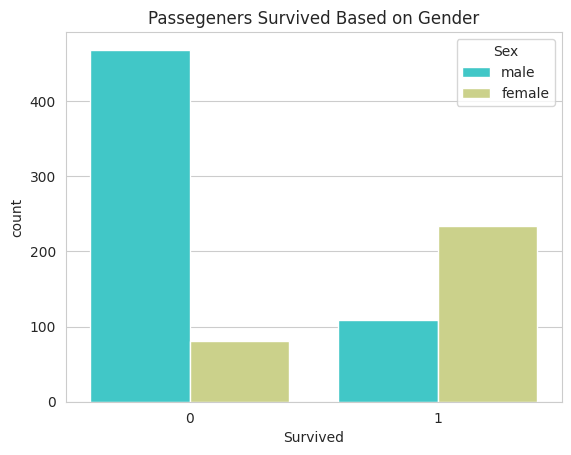

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='rainbow')
plt.title('Passegeners Survived Based on Gender')
plt.show()

**Passegeners Survived Based on Passenger Class**

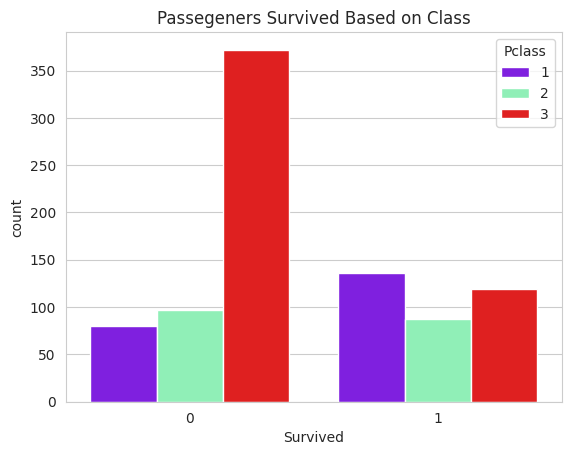

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')
plt.title('Passegeners Survived Based on Class')
plt.show()

**Distribution of Passenger Class**

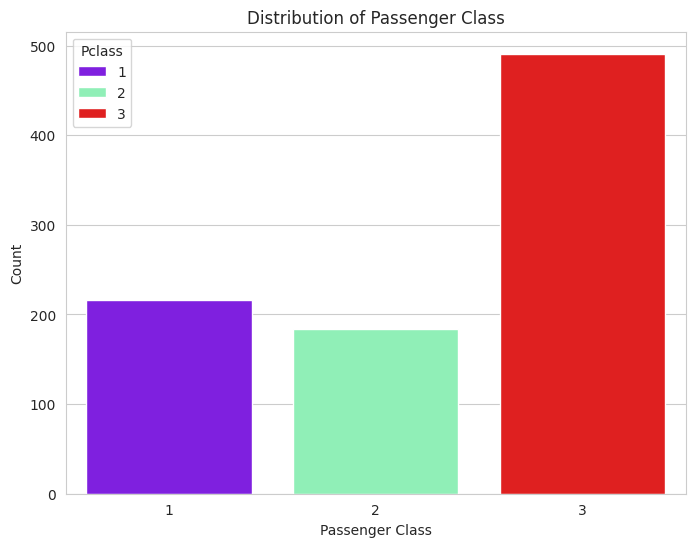

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Pclass',palette='rainbow',hue='Pclass')
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

**Distribution of Age**

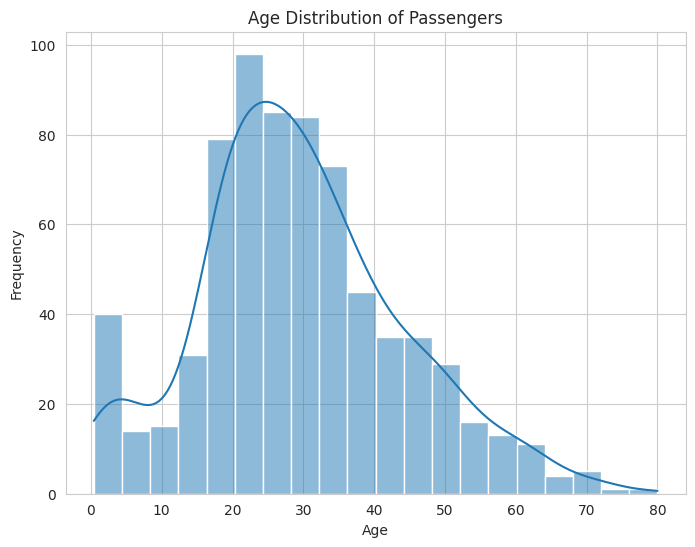

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Passenger Class vs. Fare**

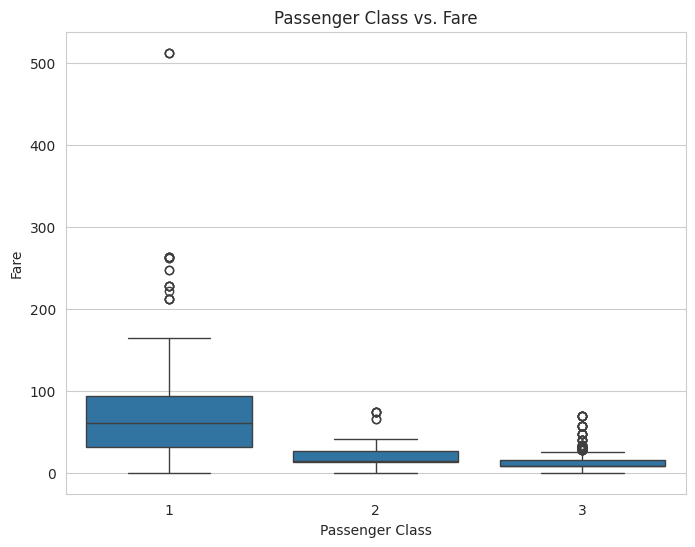

In [13]:
# Box plot for Passenger Class vs. Fare
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Passenger Class vs. Fare')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

**Count of Passengers by Embarkation Point**

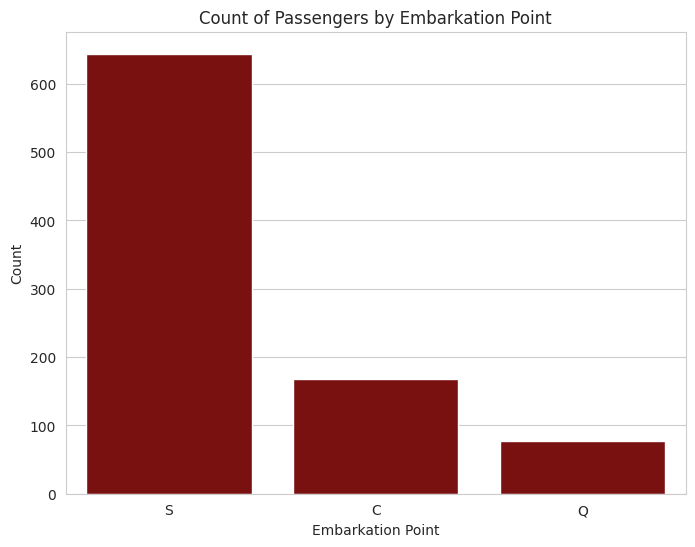

In [14]:
# Bar plot for Embarkation points
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Embarked',color='darkred')
plt.title('Count of Passengers by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()


**Age Distribution by Gender**

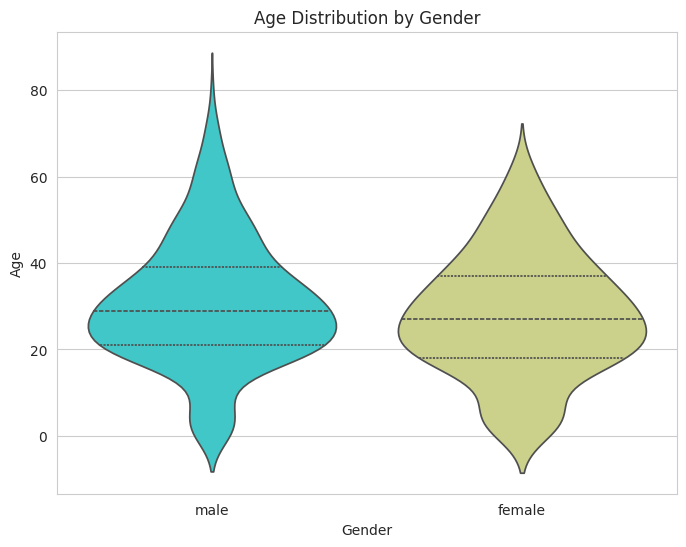

In [15]:
# Violin plot for Age distribution by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Sex', y='Age', inner='quartile',palette='rainbow',hue='Sex')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


**Distribution of Fare**

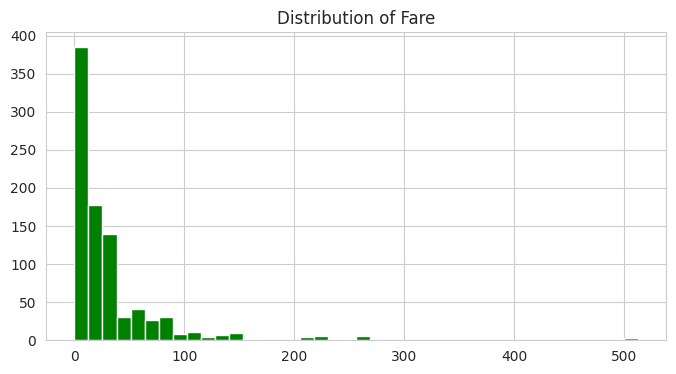

In [16]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.title('Distribution of Fare')
plt.show()

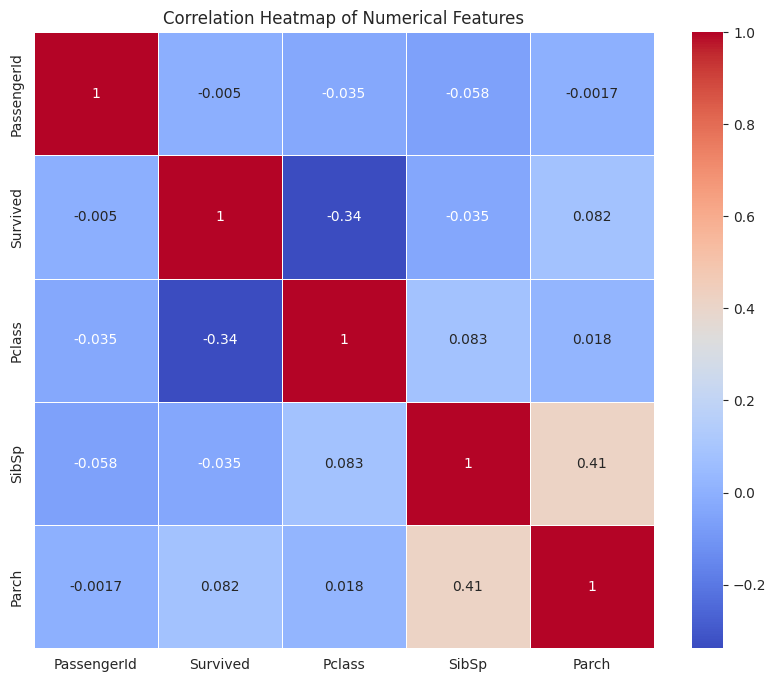

In [17]:
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class.


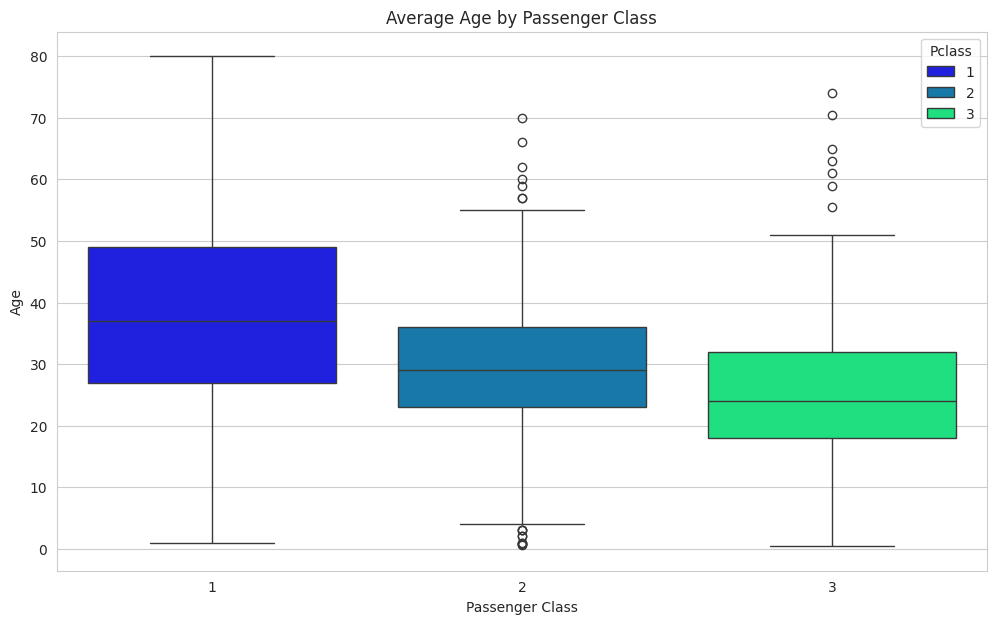

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter',hue='Pclass')
plt.title('Average Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We will use these average age values to impute based on Pclass for Age.

In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

Checking heat map again

<Axes: >

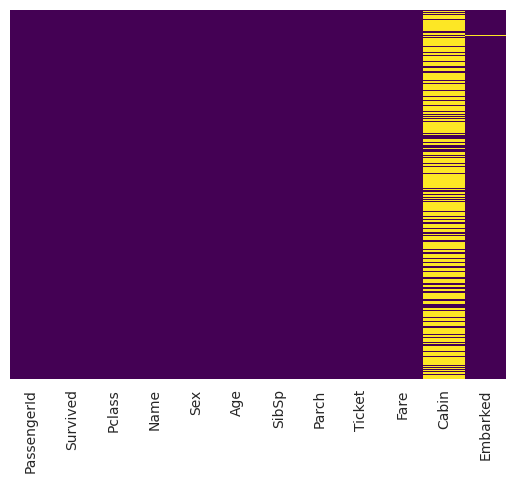

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Dropping missing values

In [22]:
df.drop('Cabin',axis=1,inplace=True)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df.dropna(inplace=True)

## Converting Categorical Features

Converting categorical features to dummy variables using pandas

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [27]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [28]:
df = pd.concat([df,sex,embark],axis=1)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True



# Building a model




## Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1),
                                                    df['Survived'], test_size=0.30,
                                                    random_state=101)

## Training and Predicting

In [31]:
pipelines = {
    'logistic_regression': Pipeline([
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'decision_tree': Pipeline([
        ('clf', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('clf', RandomForestClassifier())
    ]),
    'svm': Pipeline([
        ('clf', SVC())
    ]),
    'knn': Pipeline([
        ('clf', KNeighborsClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('clf', GaussianNB())
    ])
}

# Define parameter grids for grid search
param_grids = {
    'logistic_regression': {
        'clf__C': [0.1, 1, 10, 100]
    },
    'decision_tree': {
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    'random_forest': {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    },
    'knn': {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance']
    },
    'naive_bayes': {
        'clf__var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    'svm': {
        'clf__C': [1, 10],
        'clf__gamma': [0.1, 0.01],
        'clf__kernel': ['linear', 'rbf']
    }
}

In [32]:
# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Perform grid search for each pipeline
for model_name, pipeline in pipelines.items():
    print(f"Performing grid search for {model_name}...")
    if model_name == 'svm':
        #as svm takes alot of time so using randomized search for it
        search = RandomizedSearchCV(pipeline, param_distributions=param_grids[model_name], cv=2, n_iter=5, verbose=1, random_state=42)
    else:
        search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5, verbose=1)

    search.fit(X_train, y_train)

    print(f"Best parameters found for {model_name}:")
    print(search.best_params_)
    print(f"Best cross-validation accuracy: {search.best_score_:.3f}")

    # Evaluate on test set
    y_pred = search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))

    # Store the results in the DataFrame
    results = pd.concat([results, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }])], ignore_index=True)

    print(f"Test set accuracy: {accuracy:.3f}")
    print(f"Test set precision: {precision:.3f}")
    print(f"Test set recall: {recall:.3f}")
    print(f"Test set F1 score: {f1:.3f}")
    print("-------------------------")


Performing grid search for logistic_regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found for logistic_regression:
{'clf__C': 1}
Best cross-validation accuracy: 0.799
Confusion matrix for logistic_regression:
[[149  14]
 [ 33  71]]
Test set accuracy: 0.824
Test set precision: 0.827
Test set recall: 0.798
Test set F1 score: 0.808
-------------------------
Performing grid search for decision_tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found for decision_tree:
{'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best cross-validation accuracy: 0.781
Confusion matrix for decision_tree:
[[137  26]
 [ 26  78]]
Test set accuracy: 0.805
Test set precision: 0.795
Test set recall: 0.795
Test set F1 score: 0.795
-------------------------
Performing grid search for random_forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found for random_forest:
{'clf__max_depth': 20, 'clf__min_

In [34]:
# Display the results DataFrame
print("Results:")
print(results.sort_values(by='F1 Score', ascending=False))

Results:
                 Model  Accuracy  Precision    Recall  F1 Score
2        random_forest  0.835206   0.833043  0.816305  0.822666
0  logistic_regression  0.823970   0.826988  0.798401  0.807545
1        decision_tree  0.805243   0.795245  0.795245  0.795245
5          naive_bayes  0.805243   0.801224  0.783064  0.789509
3                  svm  0.801498   0.801099  0.774776  0.782977
4                  knn  0.621723   0.590171  0.575330  0.573233
